<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task" data-toc-modified-id="Task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task</a></span></li><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data loading</a></span><ul class="toc-item"><li><span><a href="#visualize-some-example" data-toc-modified-id="visualize-some-example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>visualize some example</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KNN</a></span><ul class="toc-item"><li><span><a href="#Implement-knn-classifier" data-toc-modified-id="Implement-knn-classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Implement knn classifier</a></span></li><li><span><a href="#testing" data-toc-modified-id="testing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>testing</a></span></li><li><span><a href="#k-folds-cross-validation" data-toc-modified-id="k-folds-cross-validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>k-folds cross validation</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Task

Task description:
1. Implemetation of the k-nearest neighbor (k-NN) algorithm and 
2. Use the k-NN for classification based on MNIST dataset available at http://yann.lecun.com/exdb/mnist/. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data loading

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
train_set_X = mnist.train.images
train_set_Y = mnist.train.labels

test_set_X = mnist.test.images
test_set_Y = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print(train_set_X.shape, train_set_Y.shape, test_set_X.shape, test_set_Y.shape)

(55000, 784) (55000, 10) (10000, 784) (10000, 10)


## visualize some example

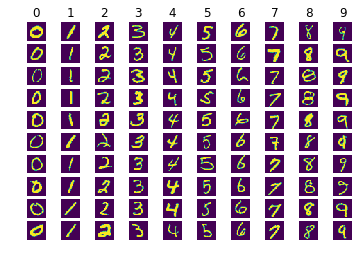

In [5]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
temp_train_y = np.argmax(train_set_Y,axis=1)

for y, cls in enumerate(classes):

    idxs = np.flatnonzero(temp_train_y == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(255*train_set_X[idx].reshape(28,28,))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# KNN

## Implement knn classifier
**key point**: Using matrix operations instead of for-loops to Calculate Image Distance

In [6]:
class KnnClassifier:
    def __init__(self, K):
        self.K = K
        pass

    def image_frature_extract(self, X):
        '''
        do nothing
        Initially， we calculate L2-distance between different image's pixel 
        '''
        return X

    def train(self, X, Y):
        '''
        X.shape: (N, D)
        Y.shape: (N, C)
        '''
        self.X = self.image_frature_extract(X)
        self.Y = Y
        pass

    def predict(self, X):
        '''
        Knn is lazylearning algorithm which use train data during testing 
        '''
        X_train = self.X
        Y_train = self.Y
        X_test = self.image_frature_extract(X)
        N_train = X_train.shape[0]
        N_test = X_test.shape[0]
        N_classes = Y_train.shape[1]

        # calculate distance matix
        distance = -2 * X_train.dot(X_test.T)
        distance = distance.T + np.sum(X_train*X_train, axis=1)
        distance = distance.T + np.sum(X_test*X_test, axis=1)
        assert distance.shape == (N_train, N_test)

        pred = np.zeros((N_test, N_classes))
        for i in range(N_test):
            nearest_label = Y_train[np.argsort(distance[:, i])[
                :self.K]]  # (K, C)
            lable_index = np.argmax(np.sum(nearest_label, axis=0))
            pred[i, lable_index] = 1

        return pred
    pass

## testing

In [7]:
knn = KnnClassifier(3)
knn.train(train_set_X, train_set_Y)
pred = knn.predict(test_set_X)
print('accuracy:', np.sum(np.argmax(pred, axis=1) == np.argmax(test_set_Y, axis=1)) / test_set_Y.shape[0])

accuracy: 0.97


## k-folds cross validation

In [8]:
from tqdm import tqdm
folds = 5
K = [1, 3, 5, 7, 10, 30, 50, 100]

X_train_folds = np.split(train_set_X[:10000], folds)
y_train_folds = np.split(train_set_Y[:10000], folds)

for k in K:
    accuracy = 0
    for index in range(folds):
        # 
        val_set_x = X_train_folds[index]
        val_set_y = y_train_folds[index]
        tra_set_x = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
        tra_set_y = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])

        val_knn = KnnClassifier(k)
        val_knn.train(tra_set_x, tra_set_y)
        pred = val_knn.predict(val_set_x)

        accuracy += np.sum(np.argmax(pred, axis=1) == np.argmax(
            val_set_y, axis=1)) / val_set_y.shape[0]

    print('K: ', k, ' accuracy: {:.2f}'.format(accuracy/folds) )

K:  1  accuracy: 1.00
K:  3  accuracy: 0.98
K:  5  accuracy: 0.96
K:  7  accuracy: 0.96
K:  10  accuracy: 0.95
K:  30  accuracy: 0.93
K:  50  accuracy: 0.91
K:  100  accuracy: 0.89


Cross-validation on the training set with only 10,000 samples shows that better accuracy obtained on the validation set **when k takes a smaller value 1, 3, 5 etc.**

# Summary

Compared whith example at http://yann.lecun.com/exdb/mnist/ , the accuracy of **0.97** in my experiment is close to that of the KNN method showed on the web page(without image preprocessing).